In [1]:
from utils import *

In [19]:
mydict = load_data(100,500)
mydict[100].GetLocations().shape[0]

100040

In [27]:
crop_data(mydict,
          min_x=-20, max_x=20,
          min_y=-20, max_y=20,
          min_z=0,max_z=30
         )
mydict[100].GetLocations().shape[0]

4620

In [28]:
data_mat = to_matrix(mydict,'Pressure')

In [29]:
cov_mat = np.cov(data_mat)

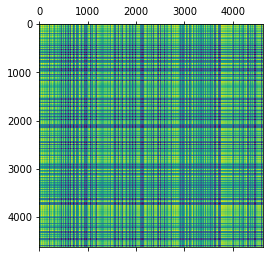

In [30]:
plt.matshow(cov_mat)

In [61]:
i_cov_max = np.argmax(cov_mat.sum(axis=1))
cov_i_max = cov_mat[i_cov_max,:]
np.max(cov_i_max)


data.AddScalarField('cov_'+str(cov_i_max), x)
ug.Write('SmallSubsetTest.vtu')

NameError: name 'ug' is not defined

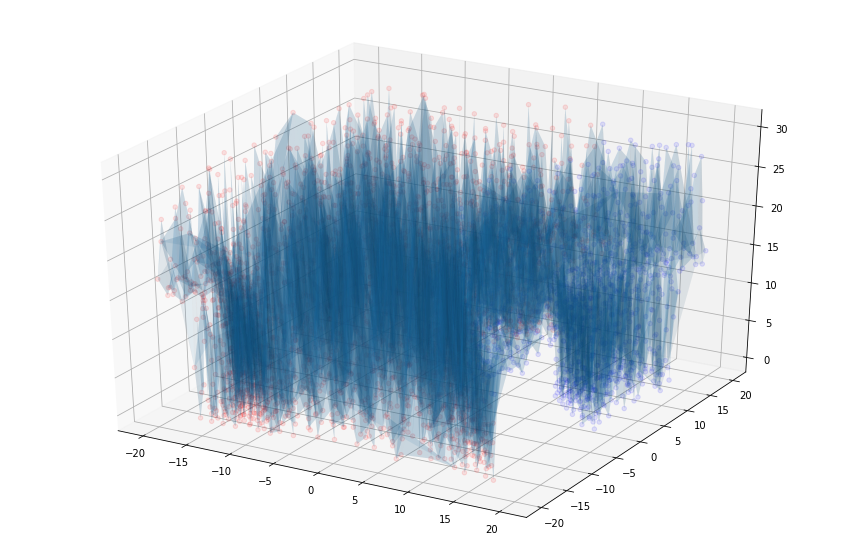

In [60]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
positions = mydict[101].GetLocations()[:,:]
field = cov_i_max
color = ['r' if i > 108  else 'b' for i in field  ]
ax.scatter(positions[:,0],positions[:,1],positions[:,2],c= color,alpha=0.1)
ax.plot_trisurf(positions[:,0],positions[:,1],positions[:,2],alpha=0.1)

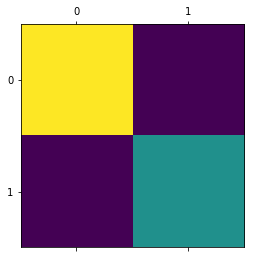